## Introduction to Portfolio Analysis

A portfolio, if selected properly, is less vulnerable to extreme highs and lows, and provides the benefits of __diversification__.

#### Dataset 

In [4]:
import pandas as pd

In [5]:
stock_returns=pd.read_csv(r'Datasets/small_portfolio.csv')
stock_returns.set_index('date', inplace = True)
stock_returns.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


In [6]:
import matplotlib.pyplot as plt

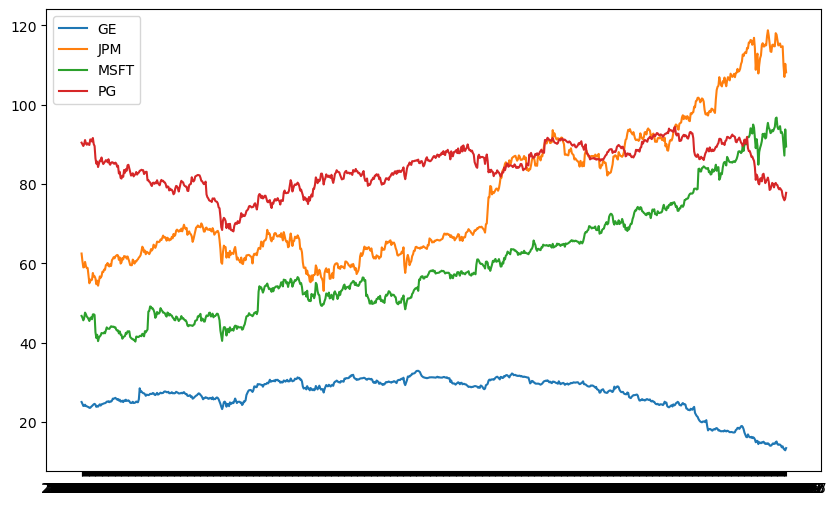

In [7]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the stock prices
ax.plot(stock_returns.index, stock_returns['GE'], label='GE')
ax.plot(stock_returns.index, stock_returns['JPM'], label='JPM')
ax.plot(stock_returns.index, stock_returns['MSFT'], label='MSFT')
ax.plot(stock_returns.index, stock_returns['PG'], label='PG')

plt.legend() # to display the labels

plt.show()

#### Portfolio returns

Calculating percentage returns from the stock data

- return = (Vt - Vt-1) / Vt-1
- .pct_change()

In [9]:
import numpy as np
# Calculate percentage returns
returns = stock_returns.pct_change()

# Calculate individual mean returns 
meanDailyReturns = returns.mean()

# Define weights for the portfolio
weights = np.array([0.5, 0.2, 0.2, 0.1])

# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [10]:
returns.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555
2015-01-07,0.000415,0.001526,0.012705,0.005246
2015-01-08,0.012043,0.022346,0.029418,0.011436


In [11]:
meanDailyReturns

GE     -0.000675
JPM     0.000769
MSFT    0.000907
PG     -0.000144
dtype: float64

In [12]:
portReturn

-1.6782226618545438e-05

#### Portfolio cumulative returns
Calculating the weighted returns and daily cummulative returns
- Portfolio = returns.dot(weights)
- daily_cum_ret=(1+returns).cumprod()

In [14]:
# Create portfolio returns column
returns['Portfolio']= returns.dot(weights)

In [15]:
returns.head()

,GE,JPM,MSFT,PG,Portfolio
date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755,-0.017723
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555,-0.019328
2015-01-07,0.000415,0.001526,0.012705,0.005246,0.003579
2015-01-08,0.012043,0.022346,0.029418,0.011436,0.017518


because of the compounding effect, need to use cumprod()

In [17]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
daily_cum_ret.tail()

,GE,JPM,MSFT,PG,Portfolio
date,,,,,
2018-03-21,0.553871,1.836134,1.977759,0.851835,0.974287
2018-03-22,0.532721,1.759482,1.920231,0.844870,0.941086
2018-03-23,0.521548,1.712434,1.864414,0.839341,0.920097
2018-03-26,0.514366,1.765242,2.005560,0.844870,0.933974
2018-03-27,0.536313,1.730997,1.913388,0.860128,0.943378


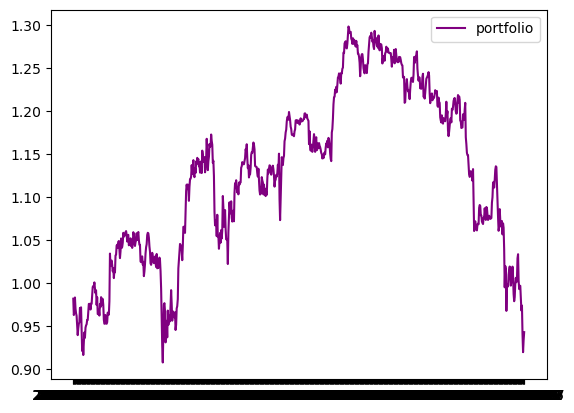

In [18]:
# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
plt.legend()
plt.show()

#### Measuring risk of a portfolio
Variance is the measure of volatility which tells the spread around the mean but in squared units, which can be less intuitive.

The standard deviation is the square root of the variance. It provides a measure of the average distance of each data point from the mean, in the same units as the original data. More directly interpretable since it is in the same units as the data.

Because returns of assets are correlated, it will influence the riskiness of the investment. So it should be an ingredient in measuring the risk.

Covariance measures how two variables change together. 

<img src="screenshots/port_Var1.jpg" alt="Image Description" width="50%">

<img src="screenshots/port_Var2.jpg" alt="Image Description" width="50%">


- cov_matrix = (daily_returns.cov())*250
- port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

In [20]:
daily_returns = stock_returns.pct_change()

In [21]:
# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

Portfolio variance = Weights transposed x (Covariance matrix x Weights) 

to get the final portfolio variance.

In [23]:
# Calculate the covariance matrix on daily returns
cov_matrix = (daily_returns.cov())*250 
'''
 Multiplying the daily covariance matrix by 250 annualizes it. 
This is because the covariance (and variance) of returns scales linearly with time when dealing with daily returns. 
So, multiplying by 250 gives you the annualized covariance matrix.

Giving insights into how the returns of different assets vary together on a yearly basis.
'''
print (cov_matrix)

            GE       JPM      MSFT        PG
GE    0.045987  0.022828  0.016285  0.010101
JPM   0.022828  0.046660  0.024135  0.010812
MSFT  0.016285  0.024135  0.054054  0.014144
PG    0.010101  0.010812  0.014144  0.020645


Microsoft is the riskiest, since it's variance is 5.4%, which is the highest of all the stocks in the portfolio

In [25]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

2.55%


In [26]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(port_variance)

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

15.959999999999999%


A 16% standard deviation means that the data typically deviates from the mean by 16%

## Risk and Return

#### Annualized Return
<img src="screenshots/annualizedreturns.JPG" alt="Image Description" width="50%">
<img src="screenshots/annualizedreturns2.JPG" alt="Image Description" width="30%">


- total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]
- annualized_return = ((1 + total_return)**(12/months))-1
- annualized_return = ((1 + total_return)**(1/years))-1

In [30]:
pf = stock_returns.copy()
pf.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


In [31]:
# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

In [32]:
# Create portfolio value column
pf['Portfolio']= pf.dot(weights)
pf.tail()

,GE,JPM,MSFT,PG,Portfolio
date,,,,,
2018-03-21,13.88,114.74,92.48,77.04,93.5940
2018-03-22,13.35,109.95,89.79,76.41,90.6870
2018-03-23,13.07,107.01,87.18,75.91,88.5890
2018-03-26,12.89,110.31,93.78,76.41,92.0050
2018-03-27,13.44,108.17,89.47,77.79,90.2285


In [33]:
pf_AUM = pf['Portfolio']

In [34]:
# Calculate total rate of return from start to end
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

C:\Users\sujay\AppData\Local\Temp\ipykernel_23400\1891743277.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]


In [35]:
months = 38

In [36]:
# Annualize return
annualized_return = ((1 + total_return)**(12/months))-1
annualized_return

0.12075420474438703

In [37]:
sp500 = pd.read_csv(r'Datasets/sp500.csv')
sp500.set_index('date', inplace = True)
sp500.head()

,S&P500
date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893


In [38]:
sp500_value = sp500['S&P500']

In [39]:
# Calculate the total return from the S&P500 value series
total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]
print(total_return)

# Annualize the total return spanning 4 years
annualized_return = ((1 + total_return)**(1/4))-1
print (annualized_return)

0.3762365831481841
0.08311176814071208


C:\Users\sujay\AppData\Local\Temp\ipykernel_23400\1509430098.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]


#### Risk adjusted returns
how much risk is involved in producing that return

- pf_returns = pf_AUM.pct_change()
- vol_pf = pf_returns.std()*np.sqrt(250)
- sharpe_ratio = ((annualized_return - rfr) / vol_sp500)


    
<img src="screenshots/sharpe_ratio_risk_adjusted_return.JPG" alt="Image Description" width="50%">

    
<img src="screenshots/annualizevolatility.JPG" alt="Image Description" width="50%">

Example assuming risk-free rate is 0

<img src="screenshots/portfolioexamples_sharpe_Ratio.JPG" alt="Image Description" width="50%">

A Sharpe ratio of 1 and up indicates that the returns on investment are proportional to the risk taken. A Sharpe ratio lower than 1 indicates that return on investment is less than the risk taken.

In [46]:
# Create the returns data 
returns_sp500 = sp500_value.pct_change()

# Calculate annualized volatility from the standard deviation
vol_sp500 = returns_sp500.std() * np.sqrt(250)

In [47]:
rfr = 0

In [48]:
# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) / vol_sp500)
sharpe_ratio

0.6105038859521855

In [49]:
# Calculate total return and annualized return from price data 
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(12/months))-1

# Create the returns data 
pf_returns = pf_AUM.pct_change()

# Calculate annualized volatility from the standard deviation
vol_pf = pf_returns.std()*np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) /vol_pf)
print (sharpe_ratio)

0.7723260825849227


C:\Users\sujay\AppData\Local\Temp\ipykernel_23400\1397688549.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]


#### Non-normal distribution of returns


Both have same mean and std dev
<img src="screenshots/nonnormal.JPG" alt="Image Description" width="50%">

Thats why we need to see skewness and kurtosis

Skewness measures the asymmetry of the distribution of data around its mean

Kurtosis measures the "tailedness" of the data distribution, indicating the presence of outliers.


<img src="screenshots/skewness.JPG" alt="Image Description" width="50%">

<img src="screenshots/pskew.JPG" alt="Image Description" width="50%">

<img src="screenshots/kurtosis.JPG" alt="Image Description" width="50%">

<img src="screenshots/kurt2.JPG" alt="Image Description" width="50%">

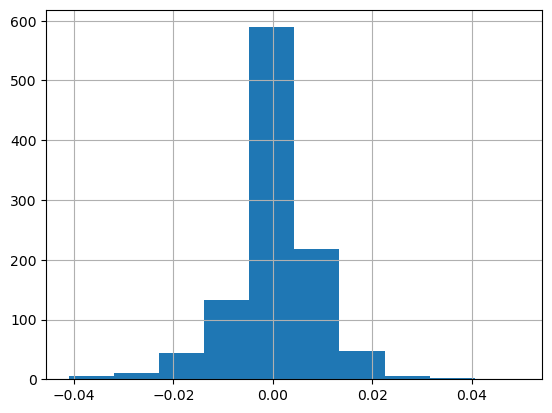

In [92]:
# Create a histogram of the S&P500 returns and show the plot
returns_sp500.hist()
plt.show()

The S&P500 data has a negative skew; the mean is to the left of the mode and median, this data has more positive returns compared to a normal distribution with a mean of zero.

In [95]:
# Print the mean
print("mean : ", returns_sp500.mean()*100)

# Print the standard deviation
print("Std. dev  : ", returns_sp500.std()*100)

# Print the skewness
print("skew : ", returns_sp500.skew())

# Print the kurtosis
print("kurt : ", returns_sp500.kurtosis())

mean :  0.03389998442910263
Std. dev  :  0.8610018502291795
skew :  -0.3831994518762794
kurt :  3.9223911008585053


array([[<Axes: title={'center': 'GE'}>, <Axes: title={'center': 'JPM'}>],
       [<Axes: title={'center': 'MSFT'}>, <Axes: title={'center': 'PG'}>],
       [<Axes: title={'center': 'Portfolio'}>, <Axes: >]], dtype=object)

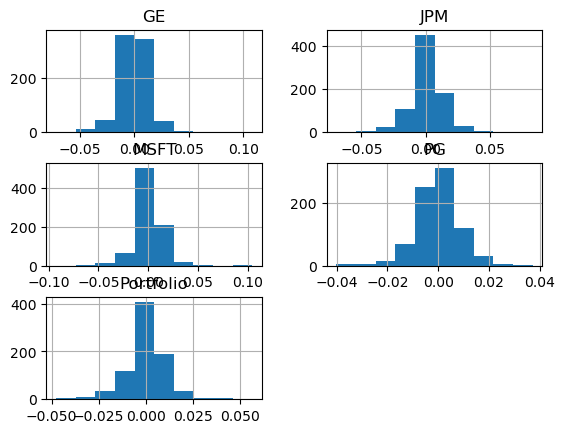

In [128]:
# Print the histograms of the stocks in the portfolio
returns.hist()

In [108]:
# Print skewness and kurtosis of the stocks
print ("skew : ", returns.skew())
print ("kurt : ", returns.kurtosis())

skew :  GE           0.177313
JPM          0.018815
MSFT         0.515431
PG          -0.259934
Portfolio   -0.159476
dtype: float64
kurt :  GE           7.766370
JPM          3.831448
MSFT         9.882177
PG           2.848092
Portfolio    3.547200
dtype: float64


only MSFT is moderately skewed.

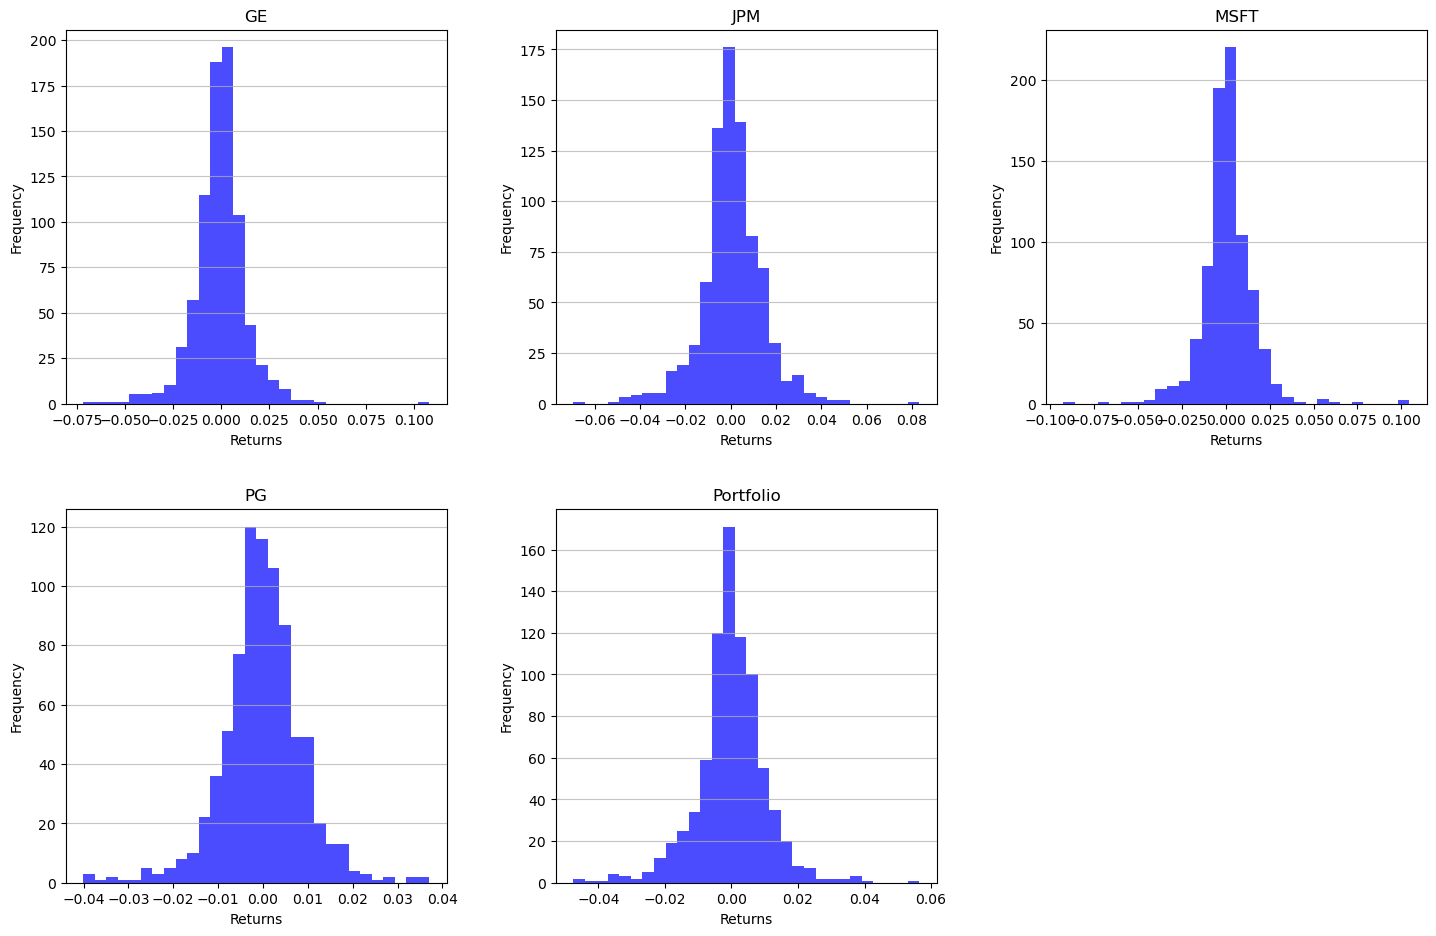

In [136]:
#CHATGPT:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame
df = returns.copy()

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create histograms
for i, column in enumerate(df.columns): # gives you the index and value of items in a list or other iterable.
    axes[i].hist(df[column], bins=30, alpha=0.7, color='blue')
    axes[i].set_title(column)
    axes[i].set_xlabel('Returns')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', alpha=0.75)

# Remove the last empty subplot (if any)
if len(df.columns) < len(axes):
    fig.delaxes(axes[-1])  # Remove last empty axis

# Adjust layout for spacing
plt.tight_layout(pad=3.0)  # Increase padding between plots
plt.show()


<img src="screenshots/maxdd.JPG" alt="Image Description" width="80%">

Taking a window of 252 trading days, find the rolling maximum value of the S&P500 daily prices

In [153]:
# Calculate the max value 
roll_max = sp500.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = sp500/roll_max - 1

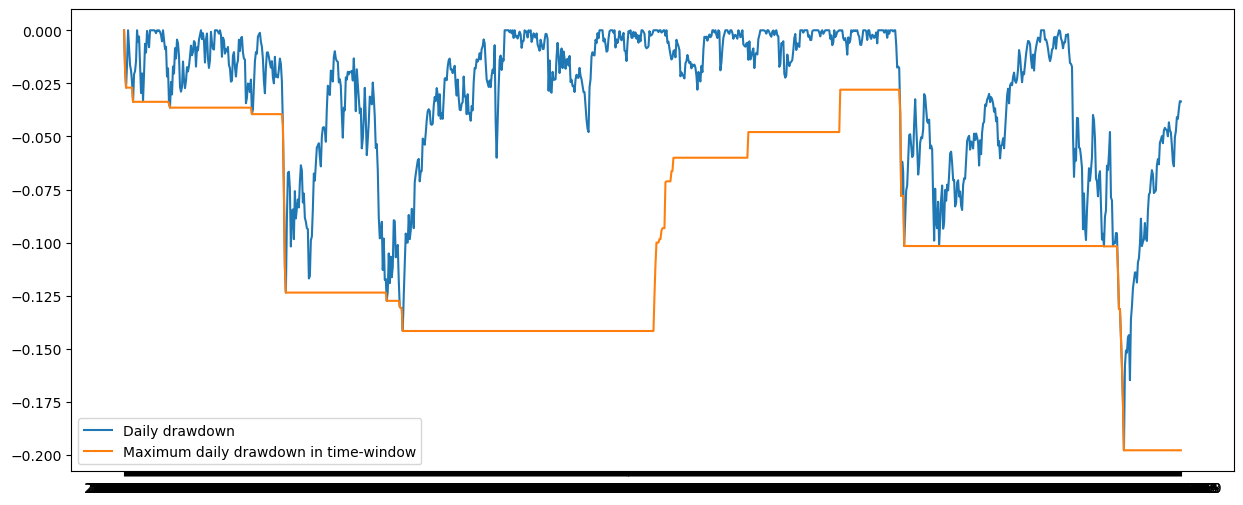

In [197]:
# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,6))

plt.plot(sp500.index, daily_draw_down, label='Daily drawdown')
plt.plot(sp500.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

In [211]:
# Concatenate the DataFrames along columns (axis=1)
drawdown = pd.concat([roll_max, daily_draw_down, max_daily_draw_down], axis=1)

# Optionally, rename the columns for clarity
drawdown.columns = ['Roll Max', 'Daily Draw Down', 'Max Daily Draw Down']

drawdown.tail(15)


,Roll Max,Daily Draw Down,Max Daily Draw Down
date,,,
2019-02-27,2930.75,-0.047213,-0.197782
2019-02-28,2930.75,-0.049905,-0.197782
2019-03-01,2930.75,-0.043354,-0.197782
2019-03-04,2930.75,-0.047066,-0.197782
2019-03-05,2930.75,-0.048145,-0.197782
2019-03-06,2930.75,-0.054355,-0.197782
2019-03-07,2930.75,-0.062039,-0.197782
2019-03-08,2930.75,-0.064038,-0.197782
2019-03-11,2930.75,-0.050311,-0.197782


In [213]:
# Save the DataFrame to an Excel file
output_file = 'drawdown_analysis.xlsx'
drawdown.to_excel(output_file)

print(f"DataFrame saved to {output_file}")

DataFrame saved to drawdown_analysis.xlsx


## Portfolio Optimization

<img src="screenshots/op_wts.JPG" alt="Image Description" width="60%">

<img src="screenshots/eff_front.JPG" alt="Image Description" width="60%">

#### PyPortfolioOpt

In [225]:
pip install PyPortfolioOpt

   ---------------------------------------- 0.0/61.9 kB ? eta -:--:--
   ---------------------------------------- 61.9/61.9 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------------------------ --------------- 0.6/1.1 MB 13.3 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 13.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/736.4 kB ? eta -:--:--
   --------------------------------------  727.0/736.4 kB 23.1 MB/s eta 0:00:01
   --------------------------------------- 736.4/736.4 kB 23.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/72.2 kB ? eta -:--:--
   ---------------------------------------- 72.2/72.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/293.0 kB ? eta -:--:--
   ---------------------------------------- 293.0/293.0 kB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---- -----------------------------

In [227]:
# Import the packages 
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

In [239]:
stock_returns.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


In [241]:
stock_prices = stock_returns.copy()

In [243]:
# Calculate expected returns mu 
mu = expected_returns.mean_historical_return(stock_prices)
mu

GE     -0.175812
JPM     0.185643
MSFT    0.223083
PG     -0.045684
dtype: float64

In [247]:
# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)
Sigma

,GE,JPM,MSFT,PG
GE,0.046355,0.023011,0.016415,0.010182
JPM,0.023011,0.047033,0.024328,0.010899
MSFT,0.016415,0.024328,0.054486,0.014257
PG,0.010182,0.010899,0.014257,0.020810


In [249]:
# Obtain the efficient frontier
ef = EfficientFrontier (mu, Sigma)
print (mu, Sigma)

GE     -0.175812
JPM     0.185643
MSFT    0.223083
PG     -0.045684
dtype: float64             GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810


In [253]:
# Get the returns from the stock price data
returns=stock_prices.pct_change()
returns.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555
2015-01-07,0.000415,0.001526,0.012705,0.005246
2015-01-08,0.012043,0.022346,0.029418,0.011436


In [255]:
# Calculate the annualized covariance matrix 
covMatrix = returns.cov()*252
covMatrix

,GE,JPM,MSFT,PG
GE,0.046355,0.023011,0.016415,0.010182
JPM,0.023011,0.047033,0.024328,0.010899
MSFT,0.016415,0.024328,0.054486,0.014257
PG,0.010182,0.010899,0.014257,0.020810


In [257]:
# Calculate the covariance matrix Sigma from a`PyPortfolioOpt` function
Sigma = risk_models.sample_cov(stock_prices)
Sigma

,GE,JPM,MSFT,PG
GE,0.046355,0.023011,0.016415,0.010182
JPM,0.023011,0.047033,0.024328,0.010899
MSFT,0.016415,0.024328,0.054486,0.014257
PG,0.010182,0.010899,0.014257,0.020810


same calculations are used

In [260]:
# Get the minimum risk portfolio for a target return 
weights = ef.efficient_return(0.2)
print (weights)

# Show portfolio performance 
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.0), ('JPM', 0.4926529085352366), ('MSFT', 0.4900890447252652), ('PG', 0.0172580467394982)])
Expected annual return: 20.0%
Annual volatility: 19.2%
Sharpe Ratio: 0.94


(0.2, 0.19152666984849023, 0.9398168941296345)

#### Maximum Sharpe vs. minimum volatility

<img src="screenshots/eff_front2.JPG" alt="Image Description" width="60%">

<img src="screenshots/eff_front3.JPG" alt="Image Description" width="60%">

In [283]:
# Define the efficient frontier
ef = EfficientFrontier(mu, Sigma)

In [285]:
# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()
print (raw_weights_maxsharpe, cleaned_weights_maxsharpe)

OrderedDict([('GE', 0.0), ('JPM', 0.4251955192429585), ('MSFT', 0.5748044807570416), ('PG', 0.0)]) OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])


In [287]:
# Show portfolio performance 
print(cleaned_weights_maxsharpe)
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])
Expected annual return: 20.7%
Annual volatility: 19.6%
Sharpe Ratio: 0.96


(0.20716402573897594, 0.19595169737742765, 0.9551538886569299)

In [299]:
# Define the new efficient frontier
ef = EfficientFrontier(mu, Sigma)

In [301]:
# Calculate weights for the minimum volatility portfolio
raw_weights_minvol = ef.min_volatility()
cleaned_weights_minvol = ef.clean_weights()
cleaned_weights_minvol

OrderedDict([('GE', 0.15732),
             ('JPM', 0.11714),
             ('MSFT', 0.04704),
             ('PG', 0.6785)])

In [303]:
# Show portfolio performance
print(cleaned_weights_minvol)
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.15732), ('JPM', 0.11714), ('MSFT', 0.04704), ('PG', 0.6785)])
Expected annual return: -2.6%
Annual volatility: 13.3%
Sharpe Ratio: -0.35


(-0.02641586175165719, 0.13292386607830187, -0.3491913312566071)

#### Exponentially weighted returns and risk

give more weight to recent data in the optimization.

In [309]:
# Define exponentially weightedSigma and mu using stock_prices
Sigma = risk_models.exp_cov(stock_prices, span=180, frequency=252)
mu = expected_returns.ema_historical_return(stock_prices, frequency=252, span=180)

# Calculate the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum sharpe ratio optimization
raw_weights_maxsharpe = ef.max_sharpe()

# Show portfolio performance 
ef.portfolio_performance(verbose=True)

Expected annual return: 27.1%
Annual volatility: 24.4%
Sharpe Ratio: 1.03


(0.27060086764443547, 0.24440611989379227, 1.0253461237113668)

Changing the span can have a big influence

In [319]:
# Calculate expected returns and sample covariance
mu_ema = expected_returns.ema_historical_return(stock_prices, span=10 ,frequency=252)
Sigma_ew = risk_models.exp_cov(stock_prices, span=10, frequency=252)
ef_2 = EfficientFrontier(mu_ema, Sigma_ew)

# Calculate weights for the maximum Sharpe ratio portfolio
weights = ef_2.max_sharpe()
cleaned_weights_maxsharpe_EW = ef_2.clean_weights()
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 12.8%
Annual volatility: 17.0%
Sharpe Ratio: 0.63
